#List of Contents
1.import libraries/ datasets
2.Security implications
3.Geographic areas
4.Cross variable regions and spending flag
5.Flag for low/ high -activity customers 
6.Profiling variable age, income, certain goods, number of dependents
7.visualizations
8.Usage frequency and expenditure 
9.Export 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path
path = r'C:\Users\JocGa\Instacart Basket Analysis'

In [3]:
#import dataframe
ords_prods_custm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))

# 2 Consider any security implications that might exist for this new data

In [4]:
#overview of dataframe
ords_prods_custm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   _merge                  category
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

#no security implications, remove names in the pervious dataframe

In [5]:
ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3 You’ll need to create a “Region” column based on the “State” column from your customers data set. 

In [6]:
ords_prods_custm['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
#create lists to store the regions
region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [8]:
#create lists to store the regions
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [9]:
#create lists to store the regions
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [10]:
#create lists to store the regions
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
#create conditions
ords_prods_custm.loc[ords_prods_custm['state'].isin(region_1_NE), 'region'] = 'Northeast'

In [12]:
#create conditions
ords_prods_custm.loc[ords_prods_custm['state'].isin(region_2_MW), 'region'] = 'Midwest'

In [13]:
#create conditions
ords_prods_custm.loc[ords_prods_custm['state'].isin(region_3_S), 'region'] = 'South'

In [14]:
#create conditions
ords_prods_custm.loc[ords_prods_custm['state'].isin(region_4_W), 'region'] = 'West'

In [15]:
#region column frequency 
ords_prods_custm['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
ords_prods_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [17]:
#Difference in Spending between regions
crosstab_spending_habits = pd.crosstab (ords_prods_custm['spending_flag'], ords_prods_custm['region'], dropna = False)

In [18]:
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,29265,18642,40564,31223
Low spender,7568060,5704094,10751321,8261690


#observations there are more ordering in the South, and lower ordering in the Northeast

In [19]:
# Create the crosstab
crosstab_spending_habits = pd.crosstab(ords_prods_custm['spending_flag'], ords_prods_custm['region'], dropna=False)

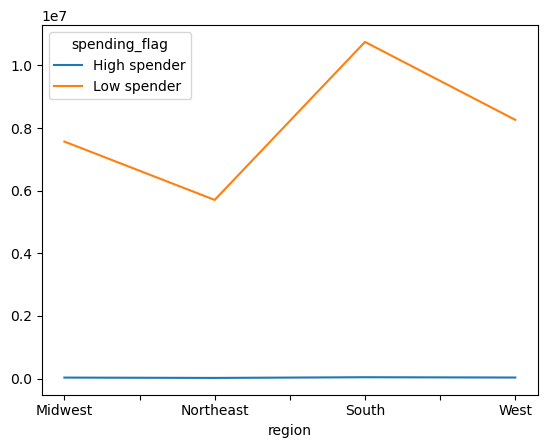

In [20]:
# Plot the line chart
line_plot = crosstab_spending_habits.T.plot.line()

#observations there are high spender in the south than the northeast

In [21]:
#spending_flag frequency 
ords_prods_custm['spending_flag'].value_counts(dropna = False)

Low spender     32285165
High spender      119694
Name: spending_flag, dtype: int64

# 4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [22]:
#create conditions for 'activity_flag' based on number of orders
ords_prods_custm.loc[ords_prods_custm['max_order']<5, 'activity_flag'] = 'low activity'

In [23]:
ords_prods_custm.loc[ords_prods_custm['max_order']>=5, 'activity_flag'] = 'High activity'

In [24]:
ords_prods_custm['activity_flag'].value_counts(dropna = False)

High activity    30964564
low activity      1440295
Name: activity_flag, dtype: int64

In [25]:
ords_prods_custm.dtypes

order_id                     int64
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_price              float64
spending_flag               object
median_prior_orders        float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
date_joined                 object
number_dependants   

In [26]:
#create a subset for low activity customers
low_activity_custm = ords_prods_custm[ords_prods_custm['activity_flag'] == 'low activity']

In [27]:
#create a subset for high activity customers
high_activity_custm = ords_prods_custm[ords_prods_custm['activity_flag'] == 'High activity']

In [28]:
low_activity_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1511,3273029,120,3,2,8,19.0,196,2,1,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1512,520620,120,1,3,11,NaN,46149,1,0,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1514,520620,120,1,3,11,NaN,26348,3,0,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity


In [29]:
high_activity_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [30]:
#export low_activity_custm dataframe
low_activity_custm.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low activity customers.pkl'))

In [31]:
#export high_activity_custm dataframe
high_activity_custm.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high activity customers.pkl'))

# 5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [32]:
#import high_activity_custm dataframe
high_activity_custm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high activity customers.pkl'))

In [33]:
#overview of high_activity_custm dataframe
high_activity_custm.dtypes

order_id                     int64
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_price              float64
spending_flag               object
median_prior_orders        float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
date_joined                 object
number_dependants   

In [34]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [36]:
df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# Profiling variable based on age

In [37]:
#profiling variable based on 'age'
high_activity_custm['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#observations the youngest age is 18 the oldest is 81, we can then group them by age groups. age group 18-39 as young adults, age group 40-64 as middle age, and 65+ as senior

In [38]:
#create conditions for 'age_category' 
high_activity_custm.loc[(high_activity_custm['age'] >=18) & (high_activity_custm['age'] < 40), 'age_category'] = 'Young adults'

In [39]:
#create conditions for 'age_category' 
high_activity_custm.loc[(high_activity_custm['age'] >=40) & (high_activity_custm['age'] < 65), 'age_category'] = 'Middle age'

In [40]:
#create conditions for 'age_category' 
high_activity_custm.loc[(high_activity_custm['age'] >=65), 'age_category'] = 'Senior'

In [41]:
high_activity_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,age,date_joined,number_dependants,family_status,income,region,activity_flag,age_category
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults
2,473747,1,3,3,12,21.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults
4,431534,1,5,4,15,28.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults


In [42]:
high_activity_custm['age_category'].value_counts(dropna = False)

Middle age      12103910
Young adults    10665110
Senior           8195544
Name: age_category, dtype: int64

#observations middle age customers make up the highest activity customers on instacart orders

In [43]:
#crosstab on age_category and family_statues
crosstab__age_family_status = pd.crosstab (high_activity_custm['age_category'], high_activity_custm['family_status'], dropna = False)

In [44]:
crosstab__age_family_status

family_status,divorced/widowed,living with parents and siblings,married,single
age_category,,,,
Middle age,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young adults,0,1481172,6523363,2660575


#Observations there are high number of married middle age customers, suggesting they are ordering for more than one person, while young adults status of living with parents and siblings are low. 

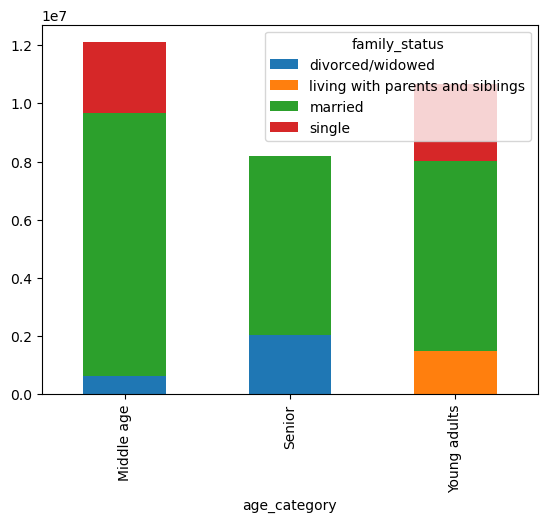

In [45]:
# Create a stacked bar chart
bar_chart_age_family_status = crosstab__age_family_status.plot(kind='bar', stacked=True)

#observation middle age group are more likely married than other age groups

In [46]:
# Age category usage frequency aggregation
high_activity_custm.groupby('age_category').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
age_category                     
Middle age    7.790702  1.0  25.0
Senior        7.795896  1.0  25.0
Young adults  7.784026  1.0  25.0

#observations the avg prices age group would pay is around 8

In [47]:
# group orders by age category and hour and count
order_count_by_age_hour = high_activity_custm.groupby(['age_category', 'order_hour_of_day'])['order_id'].count()

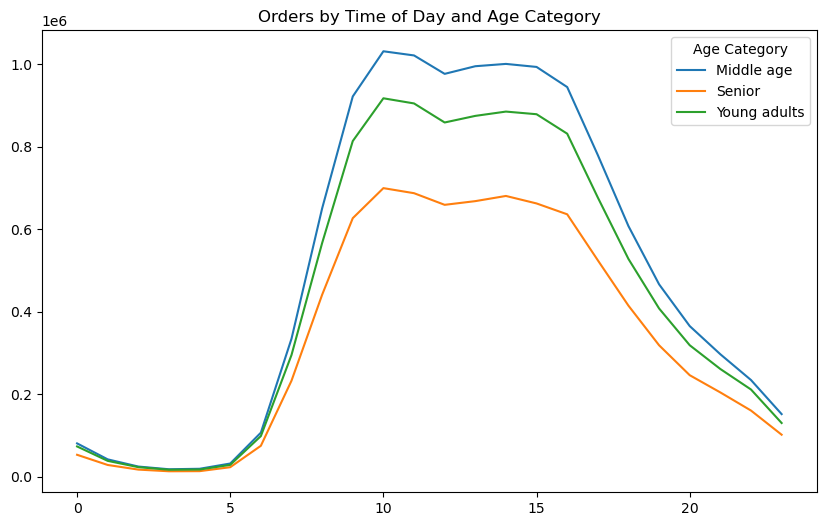

In [48]:
# create the line chart
fig, ax = plt.subplots(figsize=(10, 6))

for age_category in order_count_by_age_hour.index.levels[0]:
    ax.plot(order_count_by_age_hour.loc[age_category].index, order_count_by_age_hour.loc[age_category].values, label=age_category)
    plt.title('Orders by Time of Day and Age Category')
plt.legend(title='Age Category')

#observation middle age are making the most orders 

In [49]:
# Age category usage frequency aggregation
high_activity_custm.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
age_category                           
Middle age            8.354216   1  145
Senior                8.307779   1   99
Young adults          8.415515   1  109

#observations middle age group has the highest items add to cart with max being 145 compare to seniors group

# Profiling variable based on income

In [50]:
#profiling variable based on 'income'
high_activity_custm['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#observations the minimum income is 25,900, and the maximum is 593,900. Group them into: low = <70,000, middle-class =70,000-100,000, upper-middle-class = 100,000-130,000 and high = >130,000

In [51]:
#create conditions for 'income_category' 
high_activity_custm.loc[high_activity_custm['income']< 70000, 'income_category'] = 'Low'

In [52]:
#create conditions for 'income_category' 
high_activity_custm.loc[(high_activity_custm['income']>= 70000) & (high_activity_custm['income']< 100000), 'income_category'] = 'Middle-class'

In [53]:
#create conditions for 'income_category' 
high_activity_custm.loc[(high_activity_custm['income']>= 100000) & (high_activity_custm['income']< 130000), 'income_category'] = 'Upper-mid-class'

In [54]:
#create conditions for 'income_category' 
high_activity_custm.loc[high_activity_custm['income']>= 130000, 'income_category'] = 'High'

In [55]:
high_activity_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,number_dependants,family_status,income,region,activity_flag,age_category,income_category
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults,Low
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults,Low
2,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults,Low
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults,Low
4,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adults,Low


In [56]:
high_activity_custm['income_category'].value_counts(dropna = False)

Low                8520533
Middle-class       8236629
High               7401414
Upper-mid-class    6805988
Name: income_category, dtype: int64

#low income customers are the highest numer of customers

In [57]:
#crosstab on region and income_statues
crosstab__region_income_status = pd.crosstab (high_activity_custm['region'], high_activity_custm['income_category'], dropna = False)

In [58]:
crosstab__region_income_status

income_category,High,Low,Middle-class,Upper-mid-class
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


#observations in the high activity custm dataset, the south consist of low income status customers, it can be the prize of instacart can be affordable  

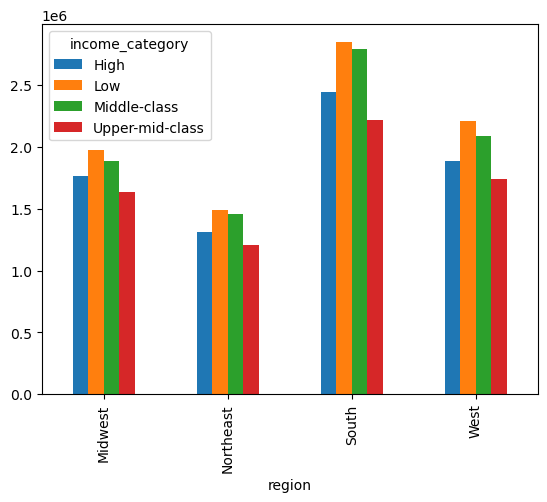

In [59]:
# Create a grouped bar chart
bar_chart_region_income = crosstab__region_income_status.plot(kind='bar')

#observation the south region contain the most high activity customers then other regions

In [60]:
#income category expenditure aggregation
high_activity_custm.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
High             7.946828  1.0  25.0
Low              7.358221  1.0  25.0
Middle-class     7.956898  1.0  25.0
Upper-mid-class  7.957010  1.0  25.0

#observations the avg price of items high-low class are ordering is 7

In [61]:
# Income category usage frequency aggregation
high_activity_custm.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
income_category                           
High                     8.480898   1  121
Low                      7.965765   1  137
Middle-class             8.528310   1  114
Upper-mid-class          8.532210   1  145

#observations the max of add to cart order are made by upper mid class, and second are low class with 137

# Profiling variable based on Certain Goods

In [62]:
#create dictionary
dept_list = dict(zip(df_depts['department_id'], df_depts['department']))

In [63]:
dept_list

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [64]:
high_activity_custm['department'] = high_activity_custm['department_id'].map(dept_list)

In [65]:
#profiling variable 'department'
high_activity_custm['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [66]:
#create conditions for 'babies_category' 
high_activity_custm.loc[high_activity_custm['department'] == 'babies', 'has_babies'] = 'yes'

In [67]:
#create conditions for 'babies_category' 
high_activity_custm.loc[high_activity_custm['department'] != 'babies', 'no_babies'] = 'no'

In [68]:
high_activity_custm['has_babies'].value_counts(dropna = False)

NaN    30554172
yes      410392
Name: has_babies, dtype: int64

#observations from the high activity customer dataset there are 410392 customers ordering babies products, which are low sells compare to other departments 

In [69]:
#crosstab on certain goods and regions
crosstab__certain_goods_regions = pd.crosstab (high_activity_custm['region'], high_activity_custm['has_babies'], dropna = False)

In [70]:
crosstab__certain_goods_regions

has_babies,yes
region,
Midwest,95741
Northeast,72712
South,139511
West,102428


#observations the northeast customers are not buying babies products compare to the south region

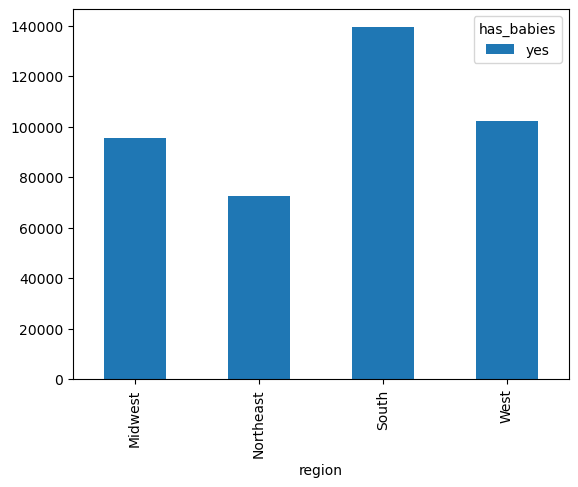

In [71]:
# Create a grouped bar chart
certain_good_regions_chart = crosstab__certain_goods_regions.plot(kind='bar')

#observation the south region are buying high volume of babies products than other regions

In [72]:
#customers buying babies products in usage frequency aggregation
high_activity_custm.groupby('has_babies').agg({'prices' : ['mean', 'min', 'max']})

prices           
                mean  min   max
has_babies                     
yes         7.634399  1.0  15.0

#observations the avg price of babies products is around 7

# Profiling variable based on number of dependents

In [73]:
#profiling variable based on 'number_dependants'
high_activity_custm['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

#observations the minimum number of dependants is 0, and the maximum is 3. Groups: small 0, mid size 1-2, and large is 3

In [74]:
#create conditions for 'number_dependants' 
high_activity_custm.loc[high_activity_custm['number_dependants'] == 0, 'family_size'] = 'small'

In [75]:
#create conditions for 'number_dependants' 
high_activity_custm.loc[(high_activity_custm['number_dependants'] == 1) | (high_activity_custm['number_dependants'] == 2), 'family_size'] = 'Mid sized'

In [76]:
#create conditions for 'number_dependants' 
high_activity_custm.loc[high_activity_custm['number_dependants'] > 2, 'family_size'] = 'large'

In [77]:
high_activity_custm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,family_status,income,region,activity_flag,age_category,income_category,department,has_babies,no_babies,family_size
0,2539329,1,1,2,8,NaN,196,1,0,both,...,married,40423,South,High activity,Young adults,Low,beverages,NaN,no,large
1,2398795,1,2,3,7,15.0,196,1,1,both,...,married,40423,South,High activity,Young adults,Low,beverages,NaN,no,large
2,473747,1,3,3,12,21.0,196,1,1,both,...,married,40423,South,High activity,Young adults,Low,beverages,NaN,no,large
3,2254736,1,4,4,7,29.0,196,1,1,both,...,married,40423,South,High activity,Young adults,Low,beverages,NaN,no,large
4,431534,1,5,4,15,28.0,196,1,1,both,...,married,40423,South,High activity,Young adults,Low,beverages,NaN,no,large


In [78]:
high_activity_custm['family_size'].value_counts(dropna = False)

Mid sized    15452367
large         7772516
small         7739681
Name: family_size, dtype: int64

In [79]:
#crosstab on family status and family size
crosstab_famliy_status_family_size = pd.crosstab (high_activity_custm['family_size'], high_activity_custm['family_status'], dropna = False)

In [80]:
crosstab_famliy_status_family_size

family_status,divorced/widowed,living with parents and siblings,married,single
family_size,,,,
Mid sized,0,992703,14459664,0
large,0,488469,7284047,0
small,2645271,0,0,5094410


#observations married midle age customers has a mid sized family, single status has small family.    

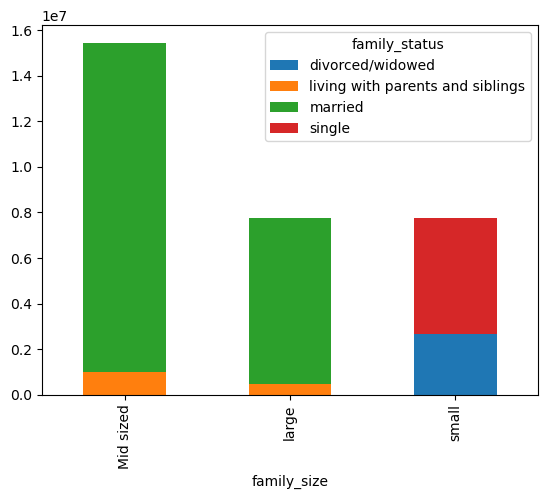

In [81]:
# Create a stacked bar chart
bar_chart_family_status_size = crosstab_famliy_status_family_size.plot(kind='bar', stacked=True)

#married status customers has a mid sized family, single family status has small sized family

In [82]:
#family size products prices usage frequency aggregation
high_activity_custm.groupby('family_size').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
family_size                     
Mid sized    7.789111  1.0  25.0
large        7.792076  1.0  25.0
small        7.788800  1.0  25.0

#observations the avg prices family size are paying is around 8

In [83]:
high_activity_custm.shape

(30964564, 39)

# Export charts

In [84]:
#export line chart
line_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','line_plot'))

In [85]:
#export bar chart
bar_chart_age_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_age_family_status'))

In [86]:
#export bar chart
bar_chart_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_region_income_status'))

In [87]:
#export bar chart
certain_good_regions_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_product_regions'))

In [88]:
#export bar chart
bar_chart_family_status_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_family_status_size'))